Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import pandas as pd
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

data=pd.DataFrame(data,index=labels)
data

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [3]:
data.shape

(10, 4)

**3.** Return the first 3 rows of the DataFrame `df`.

In [4]:
data.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [5]:
data.columns

Index(['animal', 'age', 'visits', 'priority'], dtype='object')

In [6]:
data[["animal","age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [7]:
print(data.iloc[[3,4,8]][['animal',"age"]])


  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [8]:
data.columns

Index(['animal', 'age', 'visits', 'priority'], dtype='object')

In [9]:
#print(df[df.S1>20])

print(data[data.visits>=3])

  animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [10]:
data["age"].isna()

a    False
b    False
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: age, dtype: bool

In [11]:
data["age"].isna().sum()

2

**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [13]:
#data[(data.animal]=="cat") & data[(data.age<=3)]
data[(data['animal'] == 'cat') & (data['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [19]:
data[(data["age"]>=2) & (data["age"]<=4)]
#df[(df['age'] >= 2) & (df['age'] <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [21]:
data.loc['f', 'age'] = 1.5
data

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [22]:
data["visits"].sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [24]:
data.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [38]:
dd=pd.DataFrame({'animal':["cow"],"age":["5"],"visits":['1'],"priority":['yes']},index=["k"])
data=pd.concat([data,dd])
data

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [39]:
data = data.drop('k')
data

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [28]:
data["animal"].value_counts()

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [31]:
data.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [36]:
df=data['priority'].map({'yes': True, 'no': False})
df

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [37]:
data["animal"].replace("snake","python")

a       cat
b       cat
c    python
d       dog
e       dog
f       cat
g    python
h       cat
i       dog
j       dog
Name: animal, dtype: object

# **18.** Load the ny-flights dataset to Python

In [40]:
import pandas as pd
import numpy as np


data=pd.read_csv("/content/ny-flights.csv")
data.head(5)

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00


**19.** Which airline ID is present maximum times in the dataset

In [41]:
data["airline_id"].value_counts()

airline_id
20409    4902
19790    3803
20398    2434
19805    2427
20366    2080
19393    1917
20355    1568
19977    1106
21171     301
20437     206
20436      33
19690      29
20304      11
Name: count, dtype: int64

**20.** Draw a plot between dep_delay and arr_delay

In [42]:
data.columns

Index(['fl_date', 'unique_carrier', 'airline_id', 'tail_num', 'fl_num',
       'origin', 'dest', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',
       'cancelled', 'arr', 'dep'],
      dtype='object')

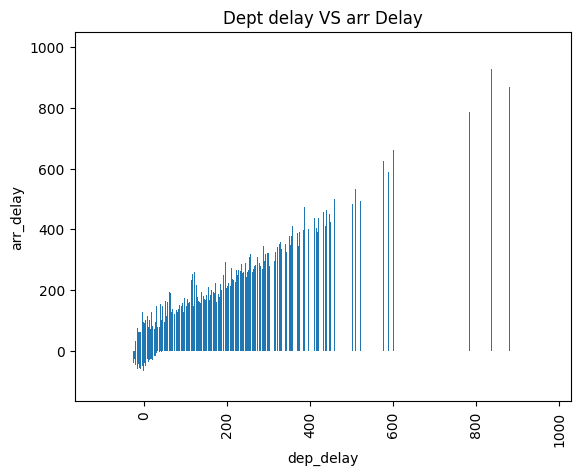

In [43]:
import matplotlib.pyplot as plt

plt.bar(data['dep_delay'],data['arr_delay'])
plt.xlabel("dep_delay")
plt.ylabel("arr_delay")
plt.xticks(rotation=90)
plt.title("Dept delay VS arr Delay")
plt.show()

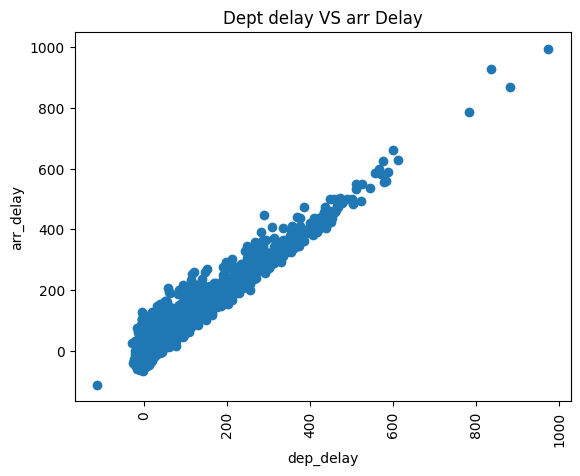

In [44]:
plt.scatter(data['dep_delay'],data['arr_delay'])
plt.xlabel("dep_delay")
plt.ylabel("arr_delay")
plt.xticks(rotation=90)
plt.title("Dept delay VS arr Delay")
plt.show()

#Diabetes Dataset EDA:



In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:
diabetes=pd.read_csv("/content/diabetes_model.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
609,4,114,64,0,0,28.9,0.126,24,0
610,2,175,88,0,0,22.9,0.326,22,0
611,3,121,52,0,0,36.0,0.127,25,1
612,7,136,74,26,135,26.0,0.647,51,0


In [49]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Univariant analysis

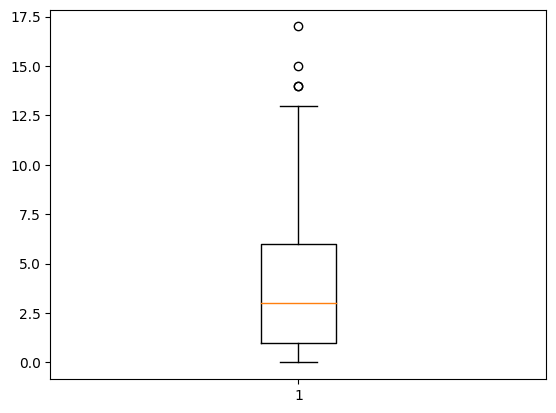

In [75]:
plt.boxplot(diabetes['Pregnancies'])
plt.show()

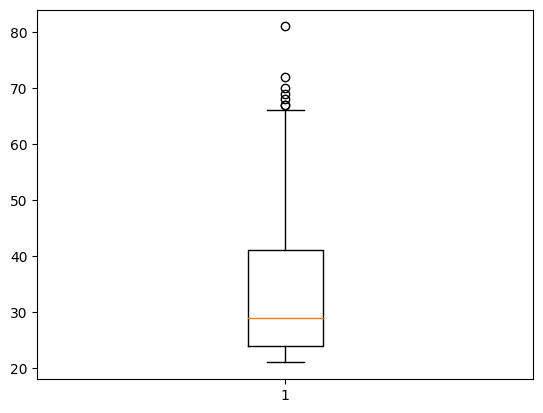

In [77]:
plt.boxplot(diabetes['Age'])
plt.show()

In [ ]:
plt.bar(diabetes['Pregnancies'])
plt.show()

# Bivariate Analysis

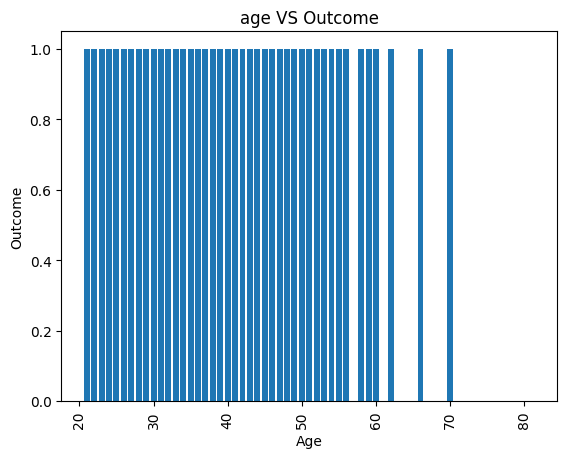

In [76]:

plt.bar(diabetes['Age'],diabetes['Outcome'])
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.xticks(rotation=90)
plt.title("age VS Outcome")
plt.show()

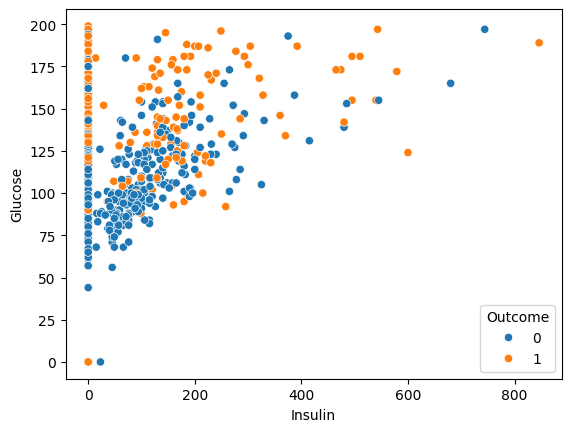

In [57]:
sns.scatterplot(data=diabetes,x="Insulin",y="Glucose",hue="Outcome")
plt.show()

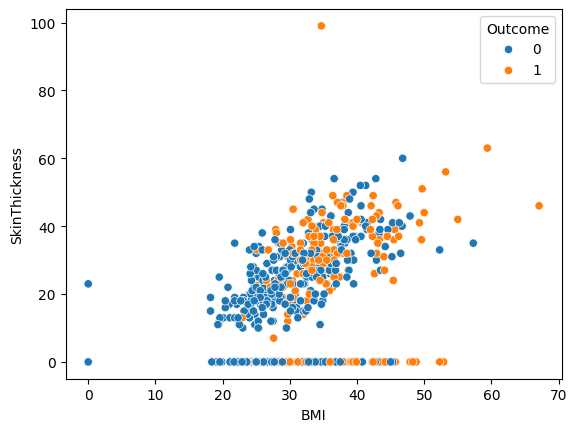

In [58]:
sns.scatterplot(data=diabetes,x="BMI",y="SkinThickness",hue="Outcome")
plt.show()

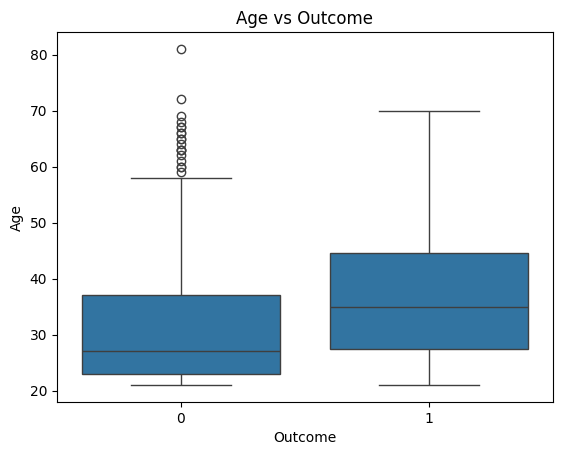

In [65]:
sns.boxplot(data=diabetes, x='Outcome', y='Age')
plt.title('Age vs Outcome')
plt.show()

<ipython-input-66-12c9d5e1ac96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes,x = 'Outcome', y = 'BloodPressure', palette = 'Blues')


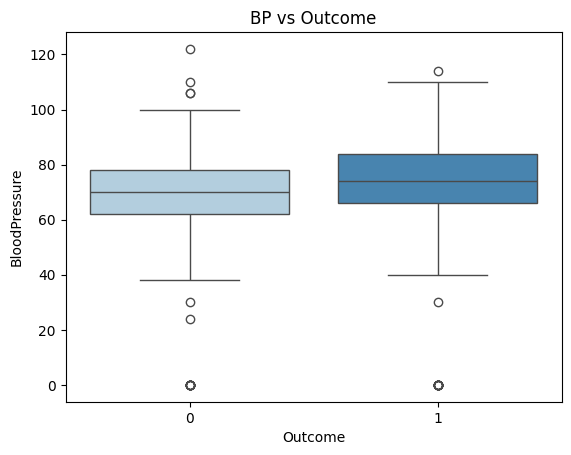

In [66]:
sns.boxplot(data=diabetes,x = 'Outcome', y = 'BloodPressure', palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

<ipython-input-70-9d038e251db6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes,x = 'Outcome', y = 'Glucose', palette = "Blues")


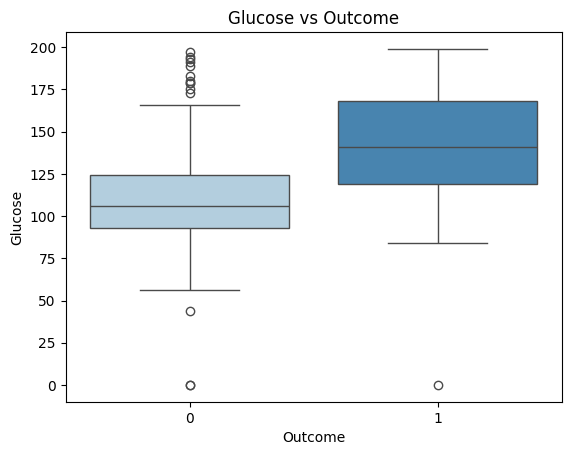

In [70]:
sns.boxplot(data=diabetes,x = 'Outcome', y = 'Glucose', palette = "Blues")
plt.title('Glucose vs Outcome')
plt.show()

# Multivariant analysis

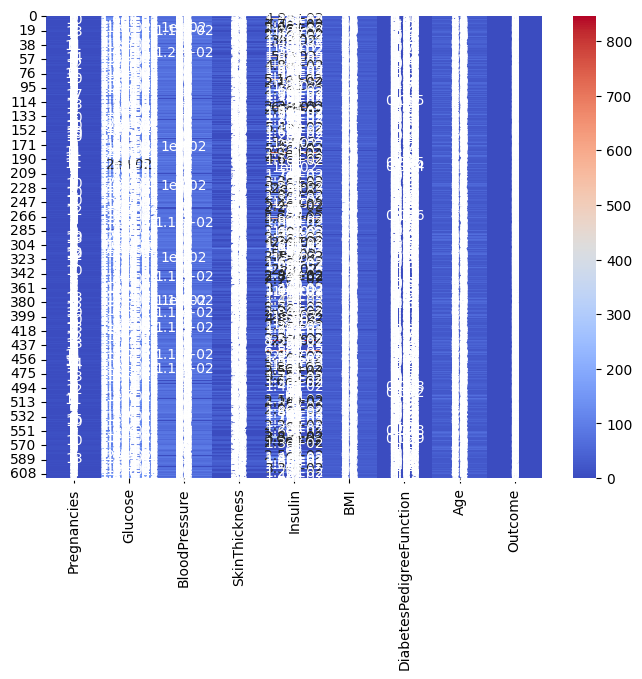

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(data=diabetes,annot=True,cmap='coolwarm')
plt.show()